# 1.  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
from sklearn.preprocessing import OneHotEncoder

project_dir = '/sasinside/userdata/gegrab/resources/hmeq'

# 2.   Read Data

In [2]:
df = pd.read_csv('Data_orig/call_center_v2.csv')
#df = df.dropna() # Or some way to treat missing values 

callcenter = df.drop(['ESCALATED', 'FEEDBACK', 'Sentiment'], axis=1)

 
 
class_inputs   = ['REASON', 'PRODUCT_TYPE']
 
target         = ["ESCALATED"]
numeric_inputs = ['DAILY_CALLS', 'MONTHLY_CALLS', 'CALL_TARGET', 'MONTHS_CUSTOMER', 
                  'NEGATIVE_RATING', 'DAYS_PROD_OUT_OF_SERVICE', 'PRODUCT_AGE', 'CALL_INQUIRIES','NUM_CALLERS','CALL_TIME']

impute_values = df[numeric_inputs].mean()
pickle.dump(impute_values, open('/sasinside/userdata/gegrab/resources/hmeq/callcenter_impute.pickle','wb'))
   
    
df           =df.fillna(impute_values)
df.REASON.replace(np.nan,'ProdFailure',regex = True, inplace=True)
df.PRODUCT_TYPE.replace(np.nan,'Other',regex = True, inplace=True)


sample =df.head()
sample.drop(['ESCALATED', 'FEEDBACK', 'Sentiment'], axis=1, inplace=True)
 
sample.to_csv('Data_orig/CALLCENTER_test2.csv', index=False)
 
print(sample.head())
#callcenter.head()

df.head()

   CALL_CENTER_ID  DAILY_CALLS  MONTHLY_CALLS  CALL_TARGET       REASON  \
0          215458          214          909.0       1217.0  ProdFailure   
1          954367          214          445.0        809.0  ProdFailure   
2          559293          214          494.0        694.0  ProdFailure   
3          289495          214          643.0        993.0   ProdGlitch   
4          123218          214          922.0       1337.0  ProdFailure   

   MONTHS_CUSTOMER  NEGATIVE_RATING  DAYS_PROD_OUT_OF_SERVICE  PRODUCT_AGE  \
0         3.000000          0.00000                  0.000000   221.515426   
1         8.922268          0.25457                  0.449442   179.766275   
2        25.000000          0.00000                  0.000000   314.638958   
3        18.000000          0.00000                  0.000000   627.702389   
4        11.000000          0.00000                  0.000000    81.446380   

   CALL_INQUIRIES  NUM_CALLERS  CALL_TIME PRODUCT_TYPE  
0        2.000000    26

/sasinside/miniconda3/envs/pytorch2021/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,CALL_CENTER_ID,ESCALATED,DAILY_CALLS,MONTHLY_CALLS,CALL_TARGET,REASON,MONTHS_CUSTOMER,NEGATIVE_RATING,DAYS_PROD_OUT_OF_SERVICE,PRODUCT_AGE,CALL_INQUIRIES,NUM_CALLERS,CALL_TIME,PRODUCT_TYPE,FEEDBACK,Sentiment
0,215458,0,214,909.0,1217.0,ProdFailure,3.000000,0.00000,0.000000,221.515426,2.000000,26.000000,34.885541,Server,So there is no way for me to plug it in here i...,0
1,954367,0,214,445.0,809.0,ProdFailure,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,37.827219,Other,"Good case, Excellent value.",1
2,559293,0,214,494.0,694.0,ProdFailure,25.000000,0.00000,0.000000,314.638958,2.000000,32.000000,35.982084,Other,Great for the jawbone.,1
3,289495,0,214,643.0,993.0,ProdGlitch,18.000000,0.00000,0.000000,627.702389,1.000000,23.000000,20.688715,Laptop,Tied to charger for conversations lasting more...,0
4,123218,0,214,922.0,1337.0,ProdFailure,11.000000,0.00000,0.000000,81.446380,3.000000,15.000000,41.395462,Other,The mic is great.,1


# 3.  Class Distribution

<AxesSubplot:xlabel='ESCALATED', ylabel='count'>

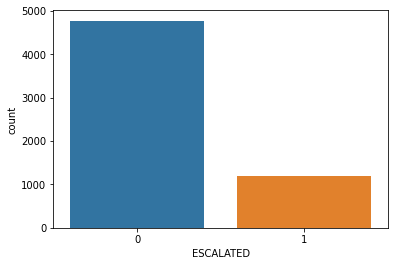

In [3]:
sns.countplot(x = 'ESCALATED', data=df)
 

# 5.  Create Input and Output Data

In [4]:

y = df.iloc[:,1]
X = df.iloc[:,2:14] 

 

 
# print(y.head())
print(X.head())

 

   DAILY_CALLS  MONTHLY_CALLS  CALL_TARGET       REASON  MONTHS_CUSTOMER  \
0          214          909.0       1217.0  ProdFailure         3.000000   
1          214          445.0        809.0  ProdFailure         8.922268   
2          214          494.0        694.0  ProdFailure        25.000000   
3          214          643.0        993.0   ProdGlitch        18.000000   
4          214          922.0       1337.0  ProdFailure        11.000000   

   NEGATIVE_RATING  DAYS_PROD_OUT_OF_SERVICE  PRODUCT_AGE  CALL_INQUIRIES  \
0          0.00000                  0.000000   221.515426        2.000000   
1          0.25457                  0.449442   179.766275        1.186055   
2          0.00000                  0.000000   314.638958        2.000000   
3          0.00000                  0.000000   627.702389        1.000000   
4          0.00000                  0.000000    81.446380        3.000000   

   NUM_CALLERS  CALL_TIME PRODUCT_TYPE  
0    26.000000  34.885541       Server 

# 6.  Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

count = y_test.value_counts()
print(count)

X_train.head()


0    1580
1     387
Name: ESCALATED, dtype: int64


,DAILY_CALLS,MONTHLY_CALLS,CALL_TARGET,REASON,MONTHS_CUSTOMER,NEGATIVE_RATING,DAYS_PROD_OUT_OF_SERVICE,PRODUCT_AGE,CALL_INQUIRIES,NUM_CALLERS,CALL_TIME,PRODUCT_TYPE
5046,171,737.170893,960.0,ProdFailure,27.0,0.0,0.0,327.001791,0.0,15.0,12.498670,Software
2639,84,439.000000,550.0,ProdFailure,1.0,0.0,0.0,169.433333,1.0,21.0,33.779915,Software
1047,276,543.000000,942.0,ProdFailure,24.0,1.0,2.0,188.393742,1.0,19.0,26.833312,Other
4089,137,358.000000,666.0,ProdFailure,22.0,0.0,0.0,231.901479,2.0,29.0,26.702473,Software
2984,99,740.000000,1083.0,ProdFailure,1.0,0.0,0.0,246.094765,0.0,36.0,17.257117,Software


In [6]:
ohe = OneHotEncoder(sparse = False, handle_unknown="ignore")
enc =  ohe.fit_transform(X_train[class_inputs])

X_train[ohe.get_feature_names(class_inputs)] = pd.DataFrame(enc, index=X_train.index)
X_train.drop(class_inputs,1,inplace=True)
#print(X_train.head())

enc2 =  ohe.fit_transform(X_test[class_inputs])
X_test[ohe.get_feature_names(class_inputs)] = pd.DataFrame(enc2, index=X_test.index)
X_test.drop(class_inputs,1,inplace=True)
#print(X_test.head())
 
pickle.dump(ohe, open(project_dir+"/callcenter_pytorch_encoder.pickle", 'wb'))

/sasinside/miniconda3/envs/pytorch2021/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/tmp/ipykernel_31952/657950375.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train.drop(class_inputs,1,inplace=True)
/sasinside/miniconda3/envs/pytorch2021/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/tmp/ipykernel_31952/657950375.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-on

In [7]:
print(X_test.head())

      DAILY_CALLS  MONTHLY_CALLS  CALL_TARGET  MONTHS_CUSTOMER  \
2660           85          540.0        625.0              4.0   
5603          198          138.0        855.0             20.0   
403           235          548.0        870.0              3.5   
5649          200         1263.0       1714.0             26.0   
903           265         2407.0       2676.0              6.0   

      NEGATIVE_RATING  DAYS_PROD_OUT_OF_SERVICE  PRODUCT_AGE  CALL_INQUIRIES  \
2660          0.00000                       1.0   313.466667             0.0   
5603          0.00000                       0.0   229.518295             3.0   
403           0.00000                       1.0   223.200000             0.0   
5649          0.25457                       5.0   329.566667             1.0   
903           0.00000                       0.0   229.307026             1.0   

      NUM_CALLERS  CALL_TIME  REASON_ProdFailure  REASON_ProdGlitch  \
2660         10.0  33.779915                 1.0   

In [8]:
print(X_test.head())
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#scaler = MinMaxScaler()
# fit scaler on the training dataset
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
pickle.dump(scaler, open('/sasinside/userdata/gegrab/resources/hmeq/callcenter_pytorch_scaler.pickle', 'wb'))

 
 

      DAILY_CALLS  MONTHLY_CALLS  CALL_TARGET  MONTHS_CUSTOMER  \
2660           85          540.0        625.0              4.0   
5603          198          138.0        855.0             20.0   
403           235          548.0        870.0              3.5   
5649          200         1263.0       1714.0             26.0   
903           265         2407.0       2676.0              6.0   

      NEGATIVE_RATING  DAYS_PROD_OUT_OF_SERVICE  PRODUCT_AGE  CALL_INQUIRIES  \
2660          0.00000                       1.0   313.466667             0.0   
5603          0.00000                       0.0   229.518295             3.0   
403           0.00000                       1.0   223.200000             0.0   
5649          0.25457                       5.0   329.566667             1.0   
903           0.00000                       0.0   229.307026             1.0   

      NUM_CALLERS  CALL_TIME  REASON_ProdFailure  REASON_ProdGlitch  \
2660         10.0  33.779915                 1.0   

# 8.  Model Parameters

In [9]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

# 9.  Define Custom Dataloaders

In [10]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

#test_tensor = torch.Tensor(test.values)
train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train.values))
                       #torch.Float(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))
 

In [11]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=1)
 

# 10.  Define Neural Net Architecture

In [12]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 18.      
        self.layer_1 = nn.Linear(18, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
         
       
        return x
    
net = binaryClassification()

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
###################### OUTPUT ######################
cuda:0

cpu


In [14]:
model2 = binaryClassification()
model2.to(device)
print(model2)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model2.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=18, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


# 11. Train the model

In [15]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [16]:
model2.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model2(X_batch)
      
        gene = torch.sigmoid(y_pred) 
        #gene = y_pred
        px = pd.DataFrame(gene).astype("float")
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.56653 | Acc: 73.810
Epoch 002: | Loss: 0.45200 | Acc: 82.381
Epoch 003: | Loss: 0.36850 | Acc: 86.429
Epoch 004: | Loss: 0.31866 | Acc: 87.810
Epoch 005: | Loss: 0.29316 | Acc: 88.460
Epoch 006: | Loss: 0.27268 | Acc: 89.635
Epoch 007: | Loss: 0.25647 | Acc: 90.079
Epoch 008: | Loss: 0.23769 | Acc: 90.857
Epoch 009: | Loss: 0.22745 | Acc: 91.095
Epoch 010: | Loss: 0.21280 | Acc: 92.032
Epoch 011: | Loss: 0.20213 | Acc: 92.524
Epoch 012: | Loss: 0.18848 | Acc: 93.032
Epoch 013: | Loss: 0.17902 | Acc: 93.460
Epoch 014: | Loss: 0.17100 | Acc: 93.698
Epoch 015: | Loss: 0.15808 | Acc: 94.206
Epoch 016: | Loss: 0.15046 | Acc: 94.476
Epoch 017: | Loss: 0.14133 | Acc: 94.698
Epoch 018: | Loss: 0.12694 | Acc: 95.540
Epoch 019: | Loss: 0.12930 | Acc: 95.476
Epoch 020: | Loss: 0.11801 | Acc: 95.825
Epoch 021: | Loss: 0.10629 | Acc: 96.397
Epoch 022: | Loss: 0.10919 | Acc: 96.079
Epoch 023: | Loss: 0.10183 | Acc: 96.476
Epoch 024: | Loss: 0.09679 | Acc: 96.254
Epoch 025: | Los

# 12.  Test the model

In [17]:
y_pred_list = []
gene_list =[]
y_test_pred_list= [] 
input_list = []

model2.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model2(X_batch)
        input = X_batch
        gene = model2(X_batch)   
        y_test_pred = torch.sigmoid(y_test_pred)
        gene = torch.sigmoid(gene) 
        y_pred_tag = torch.round(y_test_pred)
        
        y_pred_list.append(y_pred_tag.cpu().numpy())
        gene_list.append(gene.cpu().numpy())
        y_test_pred_list.append(y_test_pred.cpu().numpy())
        input_list.append(input.cpu().numpy())

 

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]


gene_list = [a.squeeze().tolist() for a in gene_list]
                          
input_list =[a.squeeze().tolist() for a in input_list]                  
    


#print(input_list[0])
#print(gene[:10])
 
print(y_test_pred_list[:5])
 
 
 

[array([[5.439192e-05]], dtype=float32), array([[6.1551946e-06]], dtype=float32), array([[0.99785775]], dtype=float32), array([[0.02226041]], dtype=float32), array([[3.1514237e-06]], dtype=float32)]


# 13.  Confusion Matrix

In [18]:
confusion_matrix(y_test, y_pred_list)

array([[1552,   28],
       [ 142,  245]])

# 14.  Classification Report

In [19]:
print(classification_report(y_test, y_pred_list))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1580
           1       0.90      0.63      0.74       387

    accuracy                           0.91      1967
   macro avg       0.91      0.81      0.85      1967
weighted avg       0.91      0.91      0.91      1967



# 15.  Save and Load the Model

In [20]:
project_dir = '/sasinside/userdata/gegrab/resources/hmeq'
torch.save(model2.state_dict(), project_dir +'/'+ 'CALLCENTER_PyTorch_Classifier.pt')
model3 = binaryClassification()
model3.load_state_dict(torch.load(project_dir + '/' + 'CALLCENTER_PyTorch_Classifier.pt'))
model3.eval()

scaler2 = pickle.load(open(project_dir + '/' + 'callcenter_pytorch_scaler.pickle', 'rb'))

#inputMatrix = scaler2.transform(X_test)
#already scaled!!!
inputMatrix = X_test

X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 


with torch.no_grad():
    predict_proba =model3(X_test_var)
    predict_proba = torch.sigmoid(predict_proba)   
    predict_proba = pd.DataFrame(predict_proba).astype("float")
    
    
print(predict_proba[:5])

          0
0  0.000054
1  0.000006
2  0.997858
3  0.022260
4  0.000003


In [21]:
#pt vs pickle??

project_dir = '/sasinside/userdata/gegrab/resources/hmeq'
torch.save(model2.state_dict(), project_dir +'/'+ 'CALLCENTER_PyTorch_Classifier.pt')
model3 = binaryClassification()
model3.load_state_dict(torch.load(project_dir + '/' + 'CALLCENTER_PyTorch_Classifier.pt'))
model3.eval()

#original method
torch.save(model2, project_dir +'/'+ 'CALLCENTER_PyTorch_Classifier_orig.pt')
model4=torch.load(project_dir +'/' + 'CALLCENTER_PyTorch_Classifier_orig.pt')

scaler2 = pickle.load(open(project_dir + '/' + 'callcenter_pytorch_scaler.pickle', 'rb'))


modelx =  binaryClassification()
modelx.load_state_dict(torch.load("/sasinside/userdata/gegrab/resources/hmeq/CALLCENTER_PyTorch_Classifier.pt"))
modelx.eval()
    

#inputMatrix = scaler2.transform(X_test)
#already scaled!!!
inputMatrix = X_test

X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 


with torch.no_grad():
    predict_proba =model3(X_test_var)
    predict_proba = torch.sigmoid(predict_proba)   
    predict_proba = pd.DataFrame(predict_proba).astype("float")
    
    
print(predict_proba[:5])

with torch.no_grad():
    predict_proba =model4(X_test_var)
    predict_proba = torch.sigmoid(predict_proba)   
    predict_proba = pd.DataFrame(predict_proba).astype("float")
    
    
print(predict_proba[:5])
 
 

          0
0  0.000054
1  0.000006
2  0.997858
3  0.022260
4  0.000003
          0
0  0.000054
1  0.000006
2  0.997858
3  0.022260
4  0.000003


In [22]:
input_params = ''
for col in callcenter.columns:
    input_params += col
    if col != callcenter.columns[-1]:
        input_params += ', '

input_cols = ''
for col in callcenter.columns:
    input_cols += "\"" + col + "\""
    if col != callcenter.columns[-1]:
        input_cols += ', '


print(input_cols)
print("")
print(input_params)


"CALL_CENTER_ID", "DAILY_CALLS", "MONTHLY_CALLS", "CALL_TARGET", "REASON", "MONTHS_CUSTOMER", "NEGATIVE_RATING", "DAYS_PROD_OUT_OF_SERVICE", "PRODUCT_AGE", "CALL_INQUIRIES", "NUM_CALLERS", "CALL_TIME", "PRODUCT_TYPE"

CALL_CENTER_ID, DAILY_CALLS, MONTHLY_CALLS, CALL_TARGET, REASON, MONTHS_CUSTOMER, NEGATIVE_RATING, DAYS_PROD_OUT_OF_SERVICE, PRODUCT_AGE, CALL_INQUIRIES, NUM_CALLERS, CALL_TIME, PRODUCT_TYPE


In [23]:
# Export the model
import onnx
torch.onnx.export(model3,               # model being run
                  X_test_var[0:2],                         # model input (or a tuple for multiple inputs)
                  "/sasinside/userdata/gegrab/resources/hmeq/CALLCENTER_PyTorch_ONNX.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to            
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'] # the model's output names
                 )

In [24]:
import onnxruntime as rt
ort_session = rt.InferenceSession("/sasinside/userdata/gegrab/resources/hmeq/CALLCENTER_PyTorch_ONNX.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(X_test_var[0:2])} 
ort_outs = torch.FloatTensor(ort_session.run(None, ort_inputs))
     
     
predict_proba = torch.sigmoid(ort_outs)   
predict_proba[0], X_test_var.shape

/tmp/ipykernel_31952/1703002696.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272204863/work/torch/csrc/utils/tensor_new.cpp:201.)
  ort_outs = torch.FloatTensor(ort_session.run(None, ort_inputs))


(tensor([[5.4392e-05],
         [6.1552e-06]]),
 torch.Size([1967, 18]))

In [25]:
def execute(CALL_CENTER_ID, DAILY_CALLS, MONTHLY_CALLS, CALL_TARGET, REASON, MONTHS_CUSTOMER, NEGATIVE_RATING, DAYS_PROD_OUT_OF_SERVICE, PRODUCT_AGE, CALL_INQUIRIES, NUM_CALLERS, CALL_TIME, PRODUCT_TYPE):
    "Output: P_ESCALATED"
        
    #global pred_onnx
    
    import onnxruntime as rt
    import pickle
    import numpy as np
    import pandas as pd
    
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import Dataset, DataLoader
    from torch.autograd import Variable
     
    
    inputArray = pd.DataFrame([[CALL_CENTER_ID, DAILY_CALLS, MONTHLY_CALLS, CALL_TARGET, REASON, MONTHS_CUSTOMER, NEGATIVE_RATING, DAYS_PROD_OUT_OF_SERVICE, PRODUCT_AGE, CALL_INQUIRIES, NUM_CALLERS, CALL_TIME, PRODUCT_TYPE]],
                              columns = ["CALL_CENTER_ID", "DAILY_CALLS", "MONTHLY_CALLS", "CALL_TARGET", "REASON", "MONTHS_CUSTOMER", "NEGATIVE_RATING", "DAYS_PROD_OUT_OF_SERVICE", "PRODUCT_AGE", "CALL_INQUIRIES", "NUM_CALLERS", "CALL_TIME", "PRODUCT_TYPE"]
                               )
    
    dummy=inputArray
     
    inputArray = pd.concat([inputArray,dummy], sort=False)
    
      
    def preprocessing(df, ohe_loc = None):

        categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    
        with open(ohe_loc, "rb") as ohe_file:
            ohe = pickle.load(ohe_file) 
        
        enc = ohe.transform(df[categorical_cols])
    
        df[ohe.get_feature_names(categorical_cols).tolist()] = pd.DataFrame(enc, index=df.index)

        df.drop(categorical_cols,1,inplace=True)

        df.dropna(inplace=True)
    
        return df

    
    inputArray.fillna(pickle.load(open('/sasinside/userdata/gegrab/resources/hmeq/callcenter_impute.pickle', 'rb')), inplace=True)
    inputArray.REASON.replace(np.nan,'ProdFailure',regex = True, inplace=True)
    inputArray.PRODUCT_TYPE.replace(np.nan,'Other',regex = True, inplace=True)


    inputArray.drop(['CALL_CENTER_ID'], axis=1, inplace=True)
    
    
    inputArray = preprocessing(inputArray, "/sasinside/userdata/gegrab/resources/hmeq/callcenter_encoder.pickle")
    
     
    
    scaler2 = pickle.load(open("/sasinside/userdata/gegrab/resources/hmeq/callcenter_pytorch_scaler.pickle", 'rb'))
    
    inputMatrix = scaler2.transform(inputArray)
    
     
    
    #X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 
    X_test_var = torch.FloatTensor(inputMatrix)
     


    ort_session = rt.InferenceSession("/sasinside/userdata/gegrab/resources/hmeq/CALLCENTER_PyTorch_ONNX.onnx")

    def to_numpy(tensor):
        return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

    ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(X_test_var)} 
    ort_outs = torch.FloatTensor(ort_session.run(None, ort_inputs))
     
     
    predict_proba = torch.sigmoid(ort_outs)   
    #predict_proba = predict_proba.numpy()
    

    P_ESCALATED = float(predict_proba[0][0])
     
     
    return (P_ESCALATED)

 

In [26]:
 
import pandas as pd
testdf= pd.read_csv('Data_orig/CALLCENTER_test2.csv')  
 

    
for i in range(5):
    print(execute(**testdf.iloc[i]))

0.00541743915528059
0.012170938774943352
0.0012175309238955379
7.953982276376337e-06
0.032101068645715714


/sasinside/miniconda3/envs/pytorch2021/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/tmp/ipykernel_31952/3096643007.py:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(categorical_cols,1,inplace=True)
/sasinside/miniconda3/envs/pytorch2021/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/tmp/ipykernel_31952/3096643007.py:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-

In [27]:
score_code = """
def execute(CALL_CENTER_ID, DAILY_CALLS, MONTHLY_CALLS, CALL_TARGET, REASON, MONTHS_CUSTOMER, NEGATIVE_RATING, DAYS_PROD_OUT_OF_SERVICE, PRODUCT_AGE, CALL_INQUIRIES, NUM_CALLERS, CALL_TIME, PRODUCT_TYPE):
    "Output: P_ESCALATED"
        
    #global pred_onnx
    
    import onnxruntime as rt
    import pickle
    import numpy as np
    import pandas as pd
    
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import Dataset, DataLoader
    from torch.autograd import Variable
     
    
    inputArray = pd.DataFrame([[CALL_CENTER_ID, DAILY_CALLS, MONTHLY_CALLS, CALL_TARGET, REASON, MONTHS_CUSTOMER, NEGATIVE_RATING, DAYS_PROD_OUT_OF_SERVICE, PRODUCT_AGE, CALL_INQUIRIES, NUM_CALLERS, CALL_TIME, PRODUCT_TYPE]],
                              columns = ["CALL_CENTER_ID", "DAILY_CALLS", "MONTHLY_CALLS", "CALL_TARGET", "REASON", "MONTHS_CUSTOMER", "NEGATIVE_RATING", "DAYS_PROD_OUT_OF_SERVICE", "PRODUCT_AGE", "CALL_INQUIRIES", "NUM_CALLERS", "CALL_TIME", "PRODUCT_TYPE"]
                               )
    
    dummy=inputArray
     
    inputArray = pd.concat([inputArray,dummy], sort=False)
    
      
    def preprocessing(df, ohe_loc = None):

        categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    
        with open(ohe_loc, "rb") as ohe_file:
            ohe = pickle.load(ohe_file) 
        
        enc = ohe.transform(df[categorical_cols])
    
        df[ohe.get_feature_names(categorical_cols).tolist()] = pd.DataFrame(enc, index=df.index)

        df.drop(categorical_cols,1,inplace=True)

        df.dropna(inplace=True)
    
        return df

    
    inputArray.fillna(pickle.load(open('/sasinside/userdata/gegrab/resources/hmeq/callcenter_impute.pickle', 'rb')), inplace=True)
    inputArray.REASON.replace(np.nan,'ProdFailure',regex = True, inplace=True)
    inputArray.PRODUCT_TYPE.replace(np.nan,'Other',regex = True, inplace=True)


    inputArray.drop(['CALL_CENTER_ID'], axis=1, inplace=True)
    
    
    inputArray = preprocessing(inputArray, "/sasinside/userdata/gegrab/resources/hmeq/callcenter_encoder.pickle")
    
     
    
    scaler2 = pickle.load(open("/sasinside/userdata/gegrab/resources/hmeq/callcenter_pytorch_scaler.pickle", 'rb'))
    
    inputMatrix = scaler2.transform(inputArray)
    
     
    
    #X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 
    X_test_var = torch.FloatTensor(inputMatrix)
     


    ort_session = rt.InferenceSession("/sasinside/userdata/gegrab/resources/hmeq/CALLCENTER_PyTorch_ONNX.onnx")

    def to_numpy(tensor):
        return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

    ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(X_test_var)} 
    ort_outs = torch.FloatTensor(ort_session.run(None, ort_inputs))
     
     
    predict_proba = torch.sigmoid(ort_outs)   
    #predict_proba = predict_proba.numpy()
    

    P_ESCALATED = float(predict_proba[0][0])
     
     
    return (P_ESCALATED)"""


f = open('Data_orig/CALLCENTER_Pytorch_ONNX.py',"w+")
f.write(score_code)
f.close()


